In [ ]:
import librosa
import IPython.display as ipd


D4_PATH = "audio/D4.mp3"
F4_PATH = "audio/F4.mp3"
C5_PATH = "audio/C5.mp3"
E5_PATH = "audio/E5.mp3"

d4_y, sr = librosa.load(D4_PATH)
f4_y, sr = librosa.load(F4_PATH)
c5_y, sr = librosa.load(C5_PATH)
e5_y, sr = librosa.load(E5_PATH)

min_len = min(len(d4_y), len(f4_y), len(c5_y), len(e5_y))

d4_y = d4_y[:min_len]
f4_y = f4_y[:min_len]
c5_y = c5_y[:min_len]
e5_y = e5_y[:min_len]

chord_y = d4_y + f4_y + c5_y + e5_y

ipd.display(ipd.Audio(d4_y, rate=sr))
ipd.display(ipd.Audio(f4_y, rate=sr))
ipd.display(ipd.Audio(c5_y, rate=sr))
ipd.display(ipd.Audio(e5_y, rate=sr))


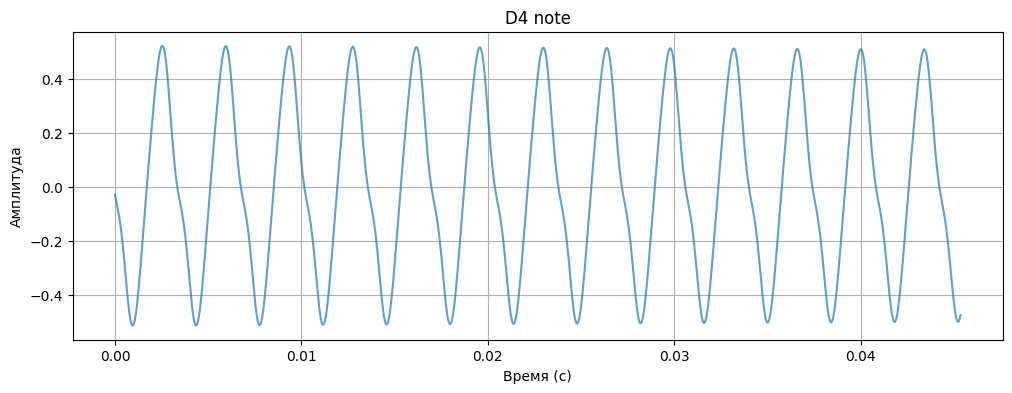

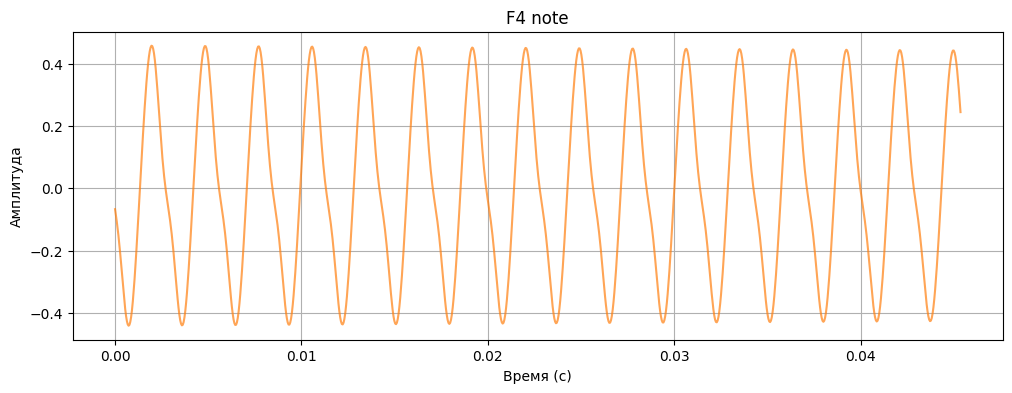

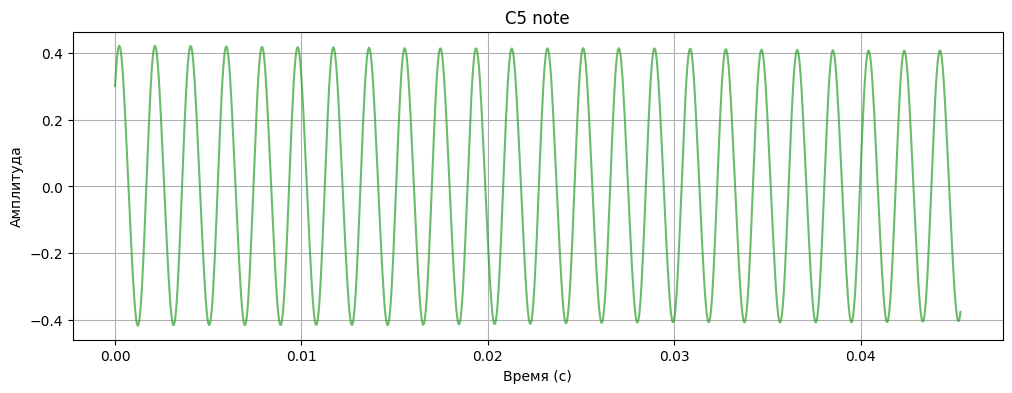

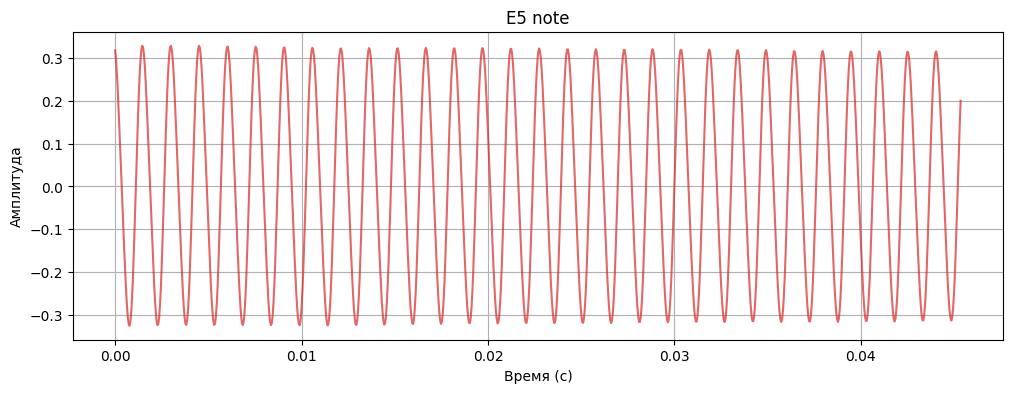

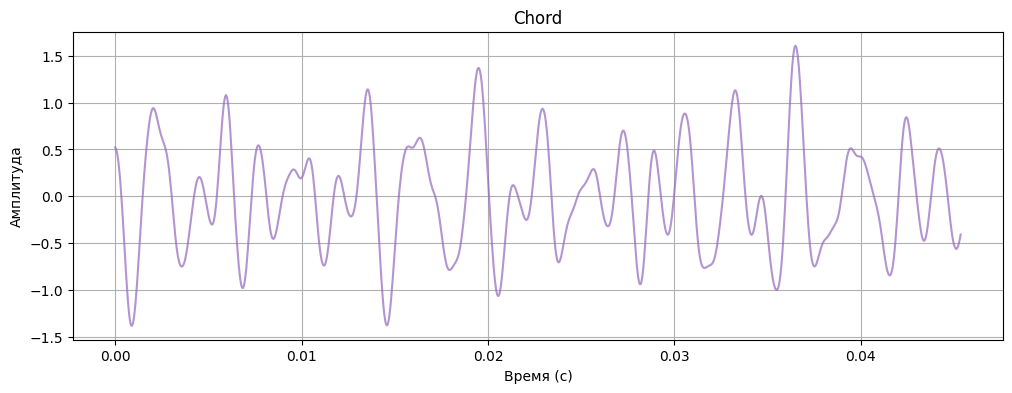

In [3]:
from src.plot import plot_audio_signal

min_len = min(len(d4_y), len(f4_y), len(c5_y), len(e5_y))

d4_y = d4_y[:min_len]
f4_y = f4_y[:min_len]
c5_y = c5_y[:min_len]
e5_y = e5_y[:min_len]

chord_y = d4_y + f4_y + c5_y + e5_y

plot_audio_signal(d4_y[sr:sr+1000], sr=sr, title="D4 note", color="tab:blue")
ipd.display(ipd.Audio(d4_y, rate=sr))

plot_audio_signal(f4_y[sr:sr+1000], sr=sr, title="F4 note", color="tab:orange")
ipd.display(ipd.Audio(f4_y, rate=sr))

plot_audio_signal(c5_y[sr:sr+1000], sr=sr, title="C5 note", color="tab:green")
ipd.display(ipd.Audio(c5_y, rate=sr))

plot_audio_signal(e5_y[sr:sr+1000], sr=sr, title="E5 note", color="tab:red")
ipd.display(ipd.Audio(e5_y, rate=sr))

plot_audio_signal(chord_y[sr:sr+1000], sr=sr, title="Chord", color="tab:purple")
ipd.display(ipd.Audio(chord_y, rate=sr))

### Fourier Transformation

Преобразование Фурье — это математическая операция, позволяющая представить сигнал (например, звуковую волну) в виде суммы простых гармонических колебаний (синусоид) разной частоты, амплитуды и фазы.

Если смотреть во временной области, мы видим, как сигнал изменяется с течением времени.
Если смотреть в частотной области, мы видим, какие частоты присутствуют в сигнале и насколько они сильные.
В результате мы получаем «спектр» — функцию, показывающую амплитуду (и фазу) на каждой частоте.

### Для чего?

- Анализ сигнала: понять, какие частоты (ноты, обертоны) присутствуют в музыке или речи.
- Обработка звука: фильтрация, компрессия, шумоподавление.
- Распознавание речи и музыки: выделить особенности голоса, инструмента.

Ранее мы рассматривали только изменение амплитуды сигнала с течением времени. 

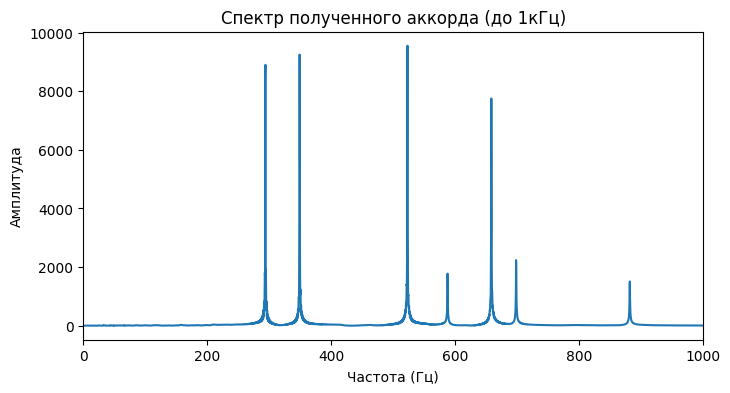

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# 1) FFT сигнала
N = len(chord_y)          # Число сэмплов
fft_values = np.fft.fft(chord_y)

# 2) Шкала частот
freqs = np.fft.fftfreq(N, 1/sr)

# 3) Берём только положительные частоты
half_N = N // 2
freqs_pos = freqs[:half_N]
fft_pos = fft_values[:half_N]

# Модуль (амплитуды) комплексных значений FFT
amplitude = np.abs(fft_pos)

# 4) Визуализируем спектр
plt.figure(figsize=(8, 4))
plt.title("Спектр полученного аккорда (до 1кГц)")
plt.plot(freqs_pos, amplitude)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.xlim([0, 1000])
plt.show()


Преобразование Фурье переводит временной сигнал в частотную область, показывая, какие синусоиды входят в его «состав».
Для звука это означает, что мы видим, какие ноты/обертоны (частоты) ярко выражены.
Аккорд можно разложить на отдельные составляющие частоты, выбрав большие пики спектра.

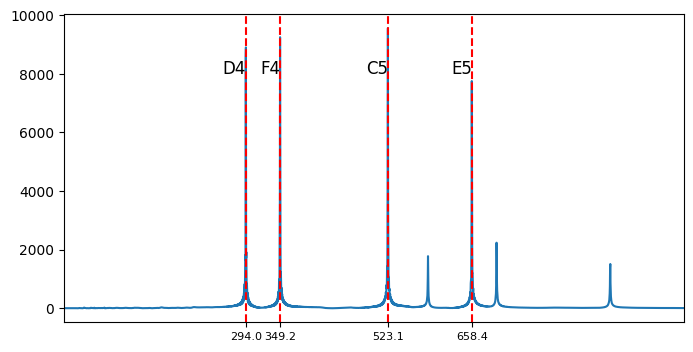

In [5]:
from scipy.signal import find_peaks

peaks, properties = find_peaks(amplitude, height=2500)
peak_freqs = freqs_pos[peaks]

plt.figure(figsize=(8, 4))
plt.plot(freqs_pos, amplitude)

for frequency_hz in peak_freqs:
    plt.axvline(x=frequency_hz, color="red", linestyle="--")
    plt.text(frequency_hz, 8000, librosa.hz_to_note(frequency_hz), size=12, ha="right")

plt.xticks(peak_freqs, fontsize=8)
plt.xlim([0, 1000])
None


In [6]:
print(f"Анализируемый аккорд состоит из нот: {[librosa.hz_to_note(frequency_hz) for frequency_hz in peak_freqs]}")

Анализируемый аккорд состоит из нот: ['D4', 'F4', 'C5', 'E5']


Теперь же давайте попробуем проделать то же самое, только уже не с одним аккордом, а небольшой аккордовой прогрессией

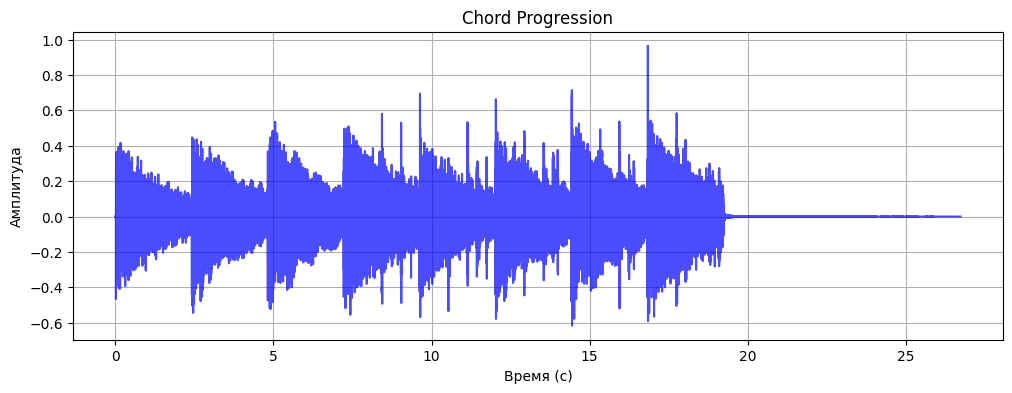

In [ ]:
CHORD_PROGRESSION_PATH = "audio/progression.mp3"

progression_y, sr = librosa.load(CHORD_PROGRESSION_PATH)

plot_audio_signal(y=progression_y, sr=sr, title="Chord Progression")
ipd.Audio(progression_y, rate=sr)


# TODO: create a separate Fourier Transform function in src

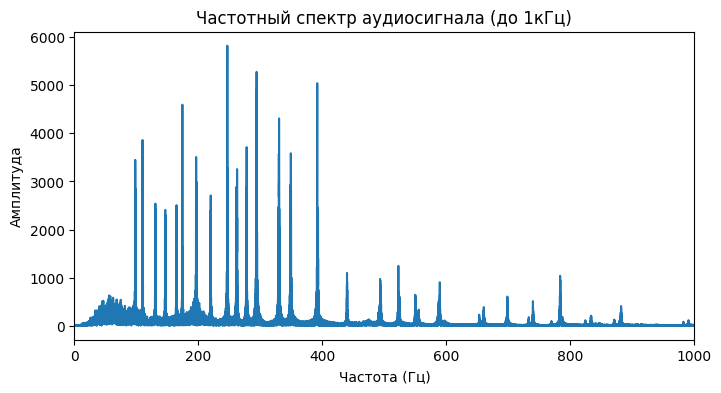

In [23]:
N = len(progression_y)
fft_values = np.fft.fft(progression_y)

freqs = np.fft.fftfreq(N, 1/sr)

half_N = N // 2
freqs_pos = freqs[:half_N]
fft_pos = fft_values[:half_N]

amplitude = np.abs(fft_pos)

plt.figure(figsize=(8, 4))
plt.title("Частотный спектр аудиосигнала (до 1кГц)")
plt.plot(freqs_pos, amplitude)
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.xlim([0, 1000])
plt.show()

Тут уже всё становится менее наглядно, так как простое преобразование фурье теряет соответствие амплитудно-частотной характеристики относительно времени, позволяя анализировать только аудиосигнал целиком. И о том как решить эту проблему мы поговорим в следующем уроке :)